In [17]:
import tensorflow as tf 
tf.__version__
import tsensor
import sys 

Matplotlib is building the font cache; this may take a moment.


In [18]:
W = tf.Variable(tf.random.uniform([5,10], -1.0, 1.0))
b = tf.Variable(tf.zeros([10]))
x = tf.constant(tf.random.uniform([10,1]))

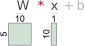

Tensorflow says : Incompatible shapes: [5,10] vs. [10,1] [Op:Mul] name: mul/

Tsensor adds : Cause: * on tensor operand W w/shape (5, 10) and operand x w/shape (10, 1)


In [23]:
try:
    with tsensor.clarify():        
        y = tf.matmul(W, x) + b
        W * x + b 
except BaseException as e:
    msgs = str(e).split('\n')
    sys.stderr.write("Tensorflow says : " + msgs[0] + '\n\n')
    sys.stderr.write("Tsensor adds : " + msgs[1] + '\n')

# Sequential API
케라스를 활용해 모델을 구축할 수 있는 가장 간단한 형태의 API다. 모델의 층들이 순차적으로 구성돼 있는 경우 사용에 용이하다

In [26]:
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Functional API
Input 모듈을 선언해야 하는데 세션 기반의 텐서플로 구현에서의 tf.placeholder와 동일한 역할이다.      
모델의 입력으로 받는 값의 형태(shape)를 정의하면 된다


In [28]:
inputs = tf.keras.Input(shape=(32,))
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
predictions = layers.Dense(10, activation='softmax')(x)

# Custom Layer
여러 레이어를 묶은 사용자 정의 층을 만들어 사용해야 할 필요성이 있을떄 ( 재사용성 )

In [30]:
class CustomLayer(layers.Layer):
    def __init__(self, hidden_dimension, hidden_dimension2, output_dimension):
        # 하이퍼 파라미터는 객체를 생성할 때 호출 되도록 정의한다.
        self.hidden_dimension = hidden_dimension
        self.hidden_dimension2 = hidden_dimension2
        self.output_dimension = output_dimension
        super(CustomLayer, self).__init__()

    def build(self, input_shape):
        # 가중치와 관련된 값들이 생성 될 수 있도록 정의한다
        self.dense_layer1 = layers.Dense(self.hidden_dimension, activation='relu')
        self.dense_layer2 = layers.Dense(self.hidden_dimension2, activation='relu')
        self.dense_layer3 = layers.Dense(self.output_dimension, activation='softmax')
    
    def call(self, inputs):
        x = self.dense_layer1(inputs)
        x = self.dense_layer2(x)

        return self.dense_layer3(x)

In [34]:
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(CustomLayer(64, 64, 10))

# Subclassing (Custom Model)
자유도가 가장 높은 내부 연산들을 직접 구현한다.

In [36]:
class MyModel(tf.keras.Model):
    def __init__(self, hidden_dimension, hidden_dimension2, output_dimension):
        # 사용될 층과 변수를 정의한다
        super(MyModel, self).__init__(name='my model')
        self.dense_layer1 = layers.Dense(hidden_dimension, activation='relu')
        self.dense_layer2 = layers.Dense(hidden_dimension2, activation='relu')
        self.dense_layer3 = layers.Dense(output_dimension, activation='softmax')

    def call(self, inputs):
        # 정의한 내용을 바탕으로 모델 연산을 진행한다.
        x = self.dense_layer1(inputs)
        x = self.dense_layer2(x)

        return self.dense_layer3(x)

# 모델 학습
크게 두 가지 방법이 있다
- keras 모델의 내장 API를 활용하는 방법 ( fit(), evaluate(), predict() )
- 학습, 검증, 예측 등 모든 과정을 Gradient Tape 객체를 활용해 직접 구현하는 방법